4 columnas numéricas

* price
* bedrooms
* bathrooms
* m2
* address (quitarle lo de ", Madrid" con numpy)

En cada apartado hacer visualizaciones con matplotlib o seaborn.

* 25 %:

* Carga de datos: cargarlo con np.genfromtext
* Media, mediana
* Máximo y mínimo
* histograma y curva de densidad

* 25 %

* Cuartiles: Q1 (25), Q2 (50), Q3 (75)
* IQR
* Filtrar 20 % más caro, y el 20 % más barato
* Opcional: filtrar los barrios 20 % más baratos
* Moda: calcular moda también de address
* Opcional: Moda de los barrios más baratos y más caros
* Dispersión: varianza y desviación estándar

25 % 

* Filtro de outliers: tukey, z-score, marcar en un gráfico los límites de outliers: rojo y azul.
* Correlación: calcular la matriz y pintarla con matplotlib/seaborn
* Estandarización

25 % 

* Asimetría y curtosis
* Transformar distribuciones e interpretar resultados
* Contraste de hipótesis:
    * Que las casas de X barrio son más baratas de las de Y barrio
    * Que las casas de >= 3 baños son más caras que las casas de 1-2 baños

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import scipy 
from scipy import stats
from collections import Counter
import pickle as pkl
import random
import seaborn as sns

### Carga de datos:
* price
* bedrooms
* bathrooms
* m2
* address

In [2]:
price = np.genfromtxt("idealista_madrid.csv", usecols=(0), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
bedrooms = np.genfromtxt("idealista_madrid.csv", usecols=(2), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
bathrooms = np.genfromtxt("idealista_madrid.csv", usecols=(1), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
m2 = np.genfromtxt("idealista_madrid.csv", usecols=(3), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
address = np.genfromtxt("idealista_madrid.csv", usecols=(4), delimiter=",", skip_header=1, encoding="utf-8", dtype=str)

print (f"price: {price[:5]}")
print (f"bedrooms: {bedrooms[:5]}")
print (f"bathrooms: {bathrooms[:5]}")
print (f"m2: {m2[:5]}")
print (f"address: {address[:5]}")


price: [1920000 1995000 1300000 1650000 1590750]
bedrooms: [3 3 4 3 3]
bathrooms: [3 3 3 3 3]
m2: [183 170 270 248 116]
address: ['Recoletos' 'Castellana' 'Hortaleza' 'Chamartín' 'Recoletos']


### Media, mediana, máximo y mínimo

In [3]:
# Medias
print("MEDIAS:")
mean_price = np.mean(price)
mean_bedr = np.mean(bedrooms)
mean_bath = np.mean(bathrooms)
mean_m2 = np.mean(m2)
print(f"Precio: {round(mean_price, 2)}\nHabitaciones: {round(mean_bedr, 2)}\nBaños: {round(mean_bath, 2)}\nm2: {round(mean_m2, 2)}") 

# Medianas
print("\nMEDIANAS")
medi_price = np.median(price)
medi_bedr = np.median(bedrooms)
medi_bath = np.median(bathrooms)
medi_m2 = np.median(m2)
print(f"Precio: {round(medi_price, 2)}\nHabitaciones: {round(medi_bedr, 2)}\nBaños: {round(medi_bath, 2)}\nm2: {round(medi_m2, 2)}") 

# Maximos
print("\nMAXIMOS:")
max_price = np.max(price)
max_bedr = np.max(bedrooms)
max_bath = np.max(bathrooms)
max_m2 = np.max(m2)
print(f"Precio: {round(max_price, 2)}\nHabitaciones: {round(max_bedr, 2)}\nBaños: {round(max_bath, 2)}\nm2: {round(max_m2, 2)}") 

# Minimos
print("\nMINIMOS:")
min_price = np.min(price)
min_bedr = np.min(bedrooms)
min_bath = np.min(bathrooms)
min_m2 = np.min(m2)
print(f"Precio: {round(min_price, 2)}\nHabitaciones: {round(min_bedr, 2)}\nBaños: {round(min_bath, 2)}\nm2: {round(min_m2, 2)}") 


MEDIAS:
Precio: 1290575.26
Habitaciones: 3.48
Baños: 2.9
m2: 217.24

MEDIANAS
Precio: 990000.0
Habitaciones: 3.0
Baños: 3.0
m2: 158.0

MAXIMOS:
Precio: 8900000
Habitaciones: 12
Baños: 12
m2: 1768

MINIMOS:
Precio: 122000
Habitaciones: 1
Baños: 1
m2: 14


### Histograma

In [4]:
def histograma(sub, var, xla, mean, medi, maxi, mini, r, tit):
    plt.subplot(1, 2, sub)
    plt.hist(var, bins=50, color='skyblue', alpha=0.5)
    plt.xlabel(xla)
    plt.ylabel("Cantidad viviendas")
    plt.axvline(mean, color='red', linestyle= 'dashed', linewidth=1, label=(f"Media: {mean:.2f} {r}"))
    plt.axvline(medi, color='green', linestyle= 'dashed', linewidth=1, label=(f"Mediana: {medi:.2f} {r}"))
    plt.axvline(maxi, color='grey', linestyle= 'dashed', linewidth=1, label=(f"Maximo: {maxi:.2f} {r}"))
    plt.axvline(mini, color='grey', linestyle= 'dashed', linewidth=1, label=(f"Minimo: {mini:.2f} {r}"))
    plt.title(f"Histograma {tit}")
    plt.legend()
    plt.show


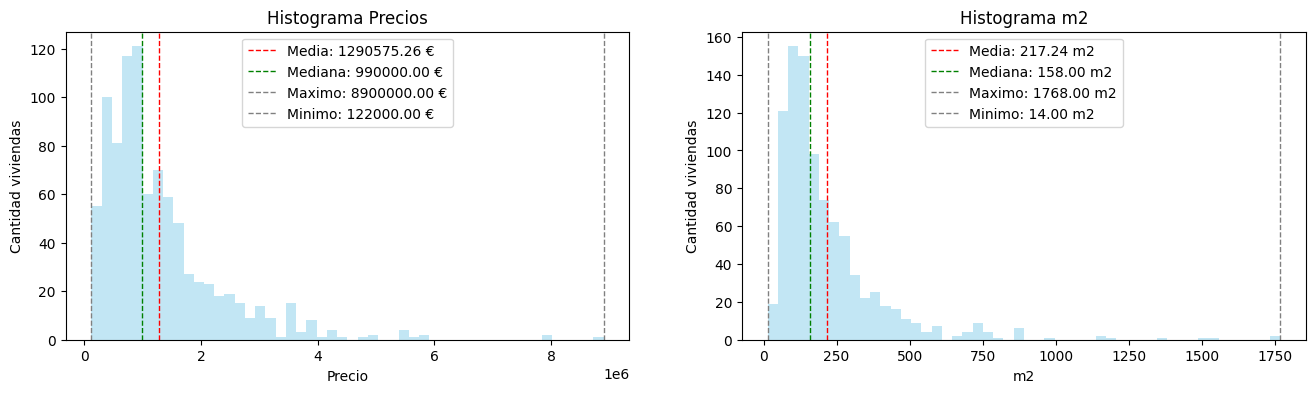

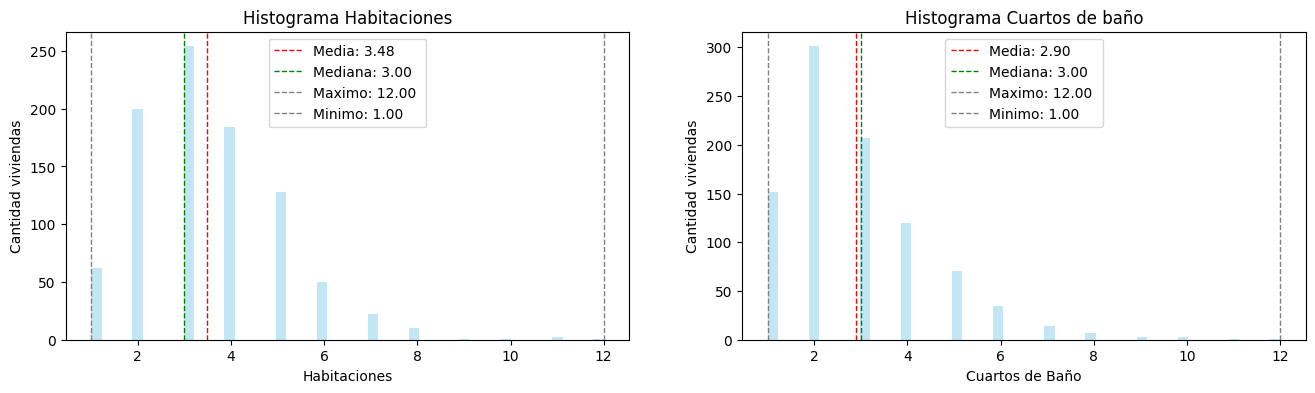

In [5]:
plt.figure(figsize=(16, 4))
histograma(1, price, "Precio", mean_price, medi_price, max_price, min_price, "€", "Precios")
histograma(2, m2, "m2", mean_m2, medi_m2, max_m2, min_m2, "m2", "m2")
plt.figure(figsize=(16, 4))
histograma(1, bedrooms, "Habitaciones", mean_bedr, medi_bedr, max_bedr, min_bath, "", "Habitaciones")
histograma(2, bathrooms, "Cuartos de Baño", mean_bath, medi_bath, max_bath, min_bath, "", "Cuartos de baño")

### Curva de densidad

In [60]:
def curva_densidad(sub, var, xla, mean, medi, maxi, mini, r, tit):
    if sub == 1:
        plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, sub)
    sns.kdeplot(var, label=xla)
    plt.axvline(mean, color='red', linestyle= 'dashed', linewidth=1, label=(f"Media: {mean:.2f} {r}"))
    plt.axvline(medi, color='green', linestyle= 'dashed', linewidth=1, label=(f"Mediana: {medi:.2f} {r}"))
    plt.axvline(maxi, color='grey', linestyle= 'dashed', linewidth=1, label=(f"Maximo: {maxi:.2f} {r}"))
    plt.axvline(mini, color='grey', linestyle= 'dashed', linewidth=1, label=(f"Minimo: {mini:.2f} {r}"))
    plt.xlabel(xla)
    plt.title(f"Curva densidad {tit}")
    plt.legend()
    

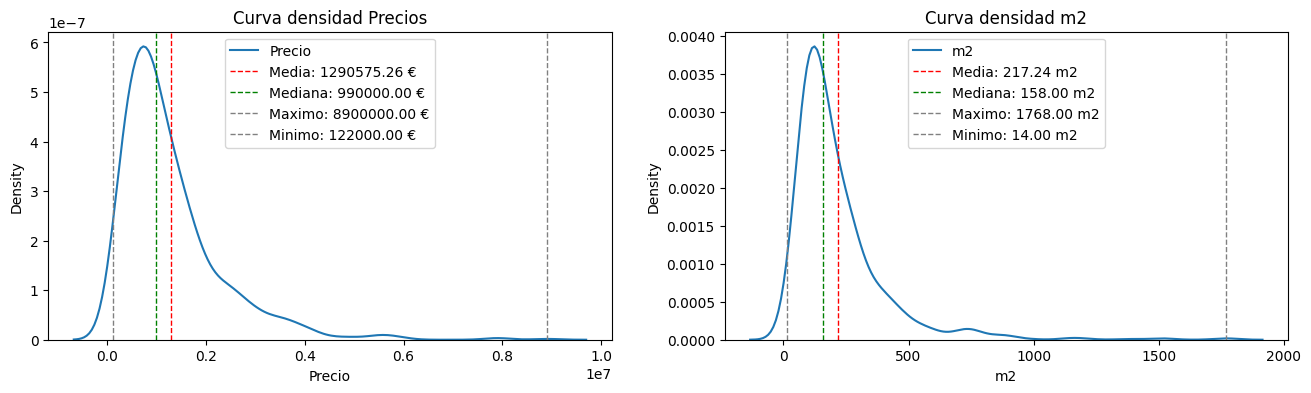

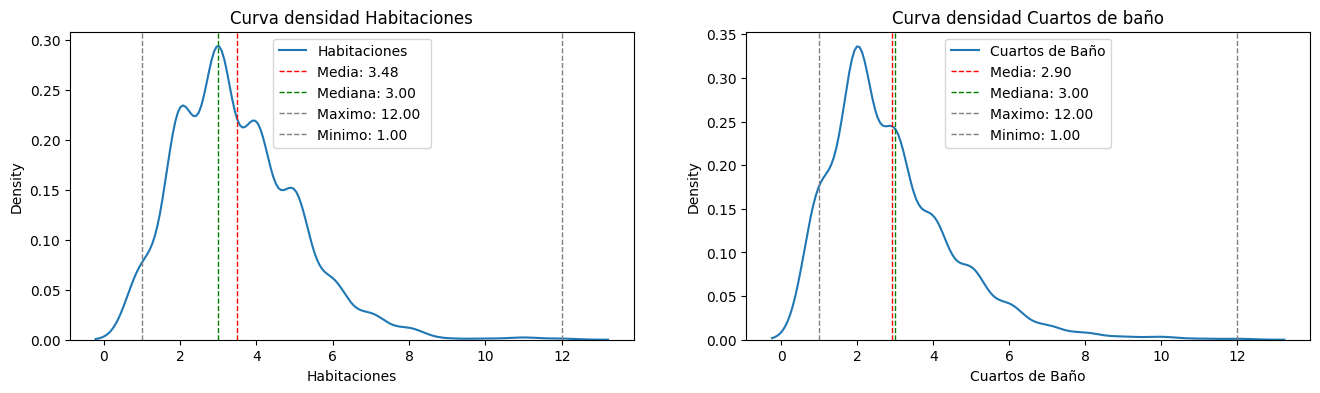

In [ ]:
curva_densidad(1, price, "Precio", mean_price, medi_price, max_price, min_price, "€", "Precios")
curva_densidad(2, m2, "m2", mean_m2, medi_m2, max_m2, min_m2, "m2", "m2")
curva_densidad(1, bedrooms, "Habitaciones", mean_bedr, medi_bedr, max_bedr, min_bath, "", "Habitaciones")
curva_densidad(2, bathrooms, "Cuartos de Baño", mean_bath, medi_bath, max_bath, min_bath, "", "Cuartos de baño")

### Cuartiles

In [8]:
print("Q1")
Q1_price = np.quantile (a= price, q= 0.25, interpolation = "lower")
Q1_bedr = np.quantile (a= bedrooms, q= 0.25, interpolation = "lower")
Q1_bath = np.quantile (a= bathrooms, q= 0.25, interpolation = "lower")
Q1_m2 = np.quantile (a= m2, q= 0.25, interpolation = "lower")
print(f"price: {round(Q1_price)} Habitaciones: {round(Q1_bedr)} baños: {round(Q1_bath)} m2: {round(Q1_m2)}")

print("\nQ2")
Q2_price = np.quantile (a= price, q= 0.50, interpolation = "lower")
Q2_bedr = np.quantile (a= bedrooms, q= 0.50, interpolation = "lower")
Q2_bath = np.quantile (a= bathrooms, q= 0.50, interpolation = "lower")
Q2_m2 = np.quantile (a= m2, q= 0.50, interpolation = "lower")
print(f"price: {round(Q2_price)} Habitaciones: {round(Q2_bedr)} baños: {round(Q2_bath)} m2: {round(Q2_m2)}")

print("\nQ3")
Q3_price = np.quantile (a= price, q= 0.75, interpolation = "lower")
Q3_bedr = np.quantile (a= bedrooms, q= 0.75, interpolation = "lower")
Q3_bath = np.quantile (a= bathrooms, q= 0.75, interpolation = "lower")
Q3_m2 = np.quantile (a= m2, q= 0.75, interpolation = "lower")
print(f"price: {round(Q3_price)} Habitaciones: {round(Q3_bedr)} baños: {round(Q3_bath)} m2: {round(Q3_m2)}")


Q1
price: 625000 Habitaciones: 2 baños: 2 m2: 104

Q2
price: 990000 Habitaciones: 3 baños: 3 m2: 158

Q3
price: 1650000 Habitaciones: 4 baños: 4 m2: 264


* Histograma

In [9]:
def histograma2(sub, var, xla, mean, medi, maxi, mini, Q1, Q2, Q3, r, tit):
    plt.subplot(1, 2, sub)
    plt.hist(var, bins=50, color='skyblue', alpha=0.5)
    plt.xlabel(xla)
    plt.ylabel("Cantidad viviendas")
    plt.axvline(mean, color='red', linestyle= 'dashed', linewidth=1, label=(f"Media: {mean:.2f} {r}"))
    plt.axvline(medi, color='green', linestyle= 'dashed', linewidth=1, label=(f"Mediana: {medi:.2f} {r}"))
    plt.axvline(maxi, color='grey', linestyle= 'dashed', linewidth=1, label=(f"Maximo: {maxi:.2f} {r}"))
    plt.axvline(mini, color='grey', linestyle= 'dashed', linewidth=1, label=(f"Minimo: {mini:.2f} {r}"))
    plt.axvline(Q1, color='blue', linestyle= 'dashed', linewidth=1, label=(f"Q1 (25%): {Q1:.2f} {r}"))
    plt.axvline(Q2, color='yellow', linestyle= 'dashed', linewidth=1, label=(f"Q2 (50%): {Q2:.2f} {r}"))
    plt.axvline(Q3, color='orange', linestyle= 'dashed', linewidth=1, label=(f"Q3 (75%): {Q3:.2f} {r}"))
    plt.title(f"Histograma {tit}")
    plt.legend()
    plt.show

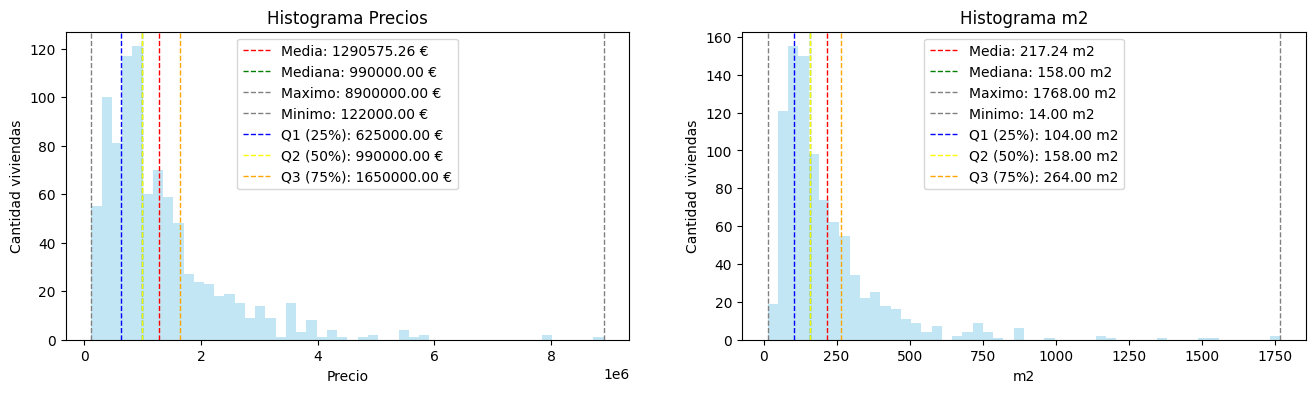

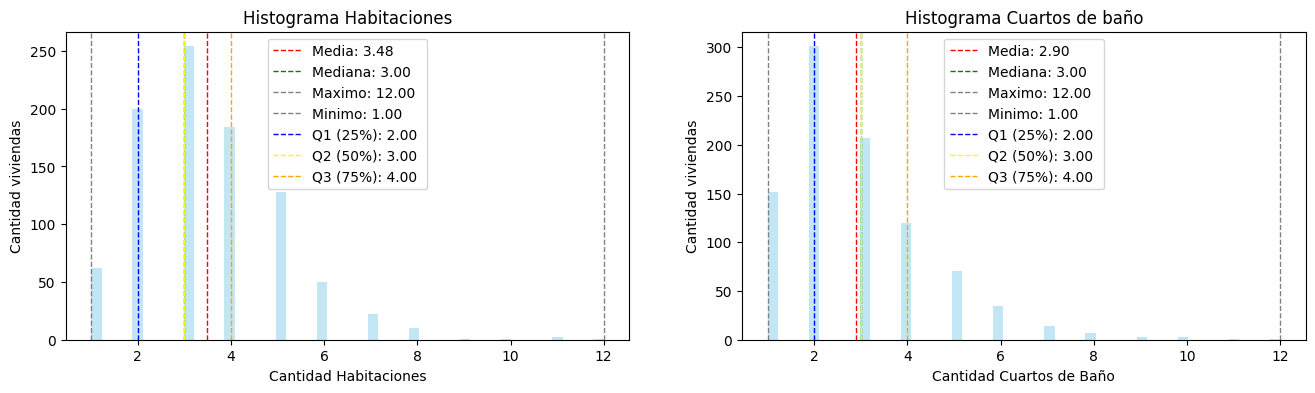

In [10]:
plt.figure(figsize=(16, 4))
histograma2(1, price, "Precio", mean_price, medi_price, max_price, min_price, Q1_price, Q2_price, Q3_price, "€", "Precios")
histograma2(2, m2, "m2", mean_m2, medi_m2, max_m2, min_m2, Q1_m2, Q2_m2, Q3_m2, "m2", "m2")
plt.figure(figsize=(16, 4))
histograma2(1, bedrooms, "Cantidad Habitaciones", mean_bedr, medi_bedr, max_bedr, min_bath, Q1_bedr, Q2_bedr, Q3_bedr, "", "Habitaciones")
histograma2(2, bathrooms, "Cantidad Cuartos de Baño", mean_bath, medi_bath, max_bath, min_bath, Q1_bath, Q2_bath, Q3_bath, "", "Cuartos de baño")

* Boxplot

In [11]:
def boxplot(sub, dato, label1, yla):
    plt.subplot(1, 2, sub)
    plt.boxplot(dato, showmeans=True, orientation="horizontal")
    plt.xlabel(yla)
    plt.grid()
    plt.title(f"Boxplot de {label1}")


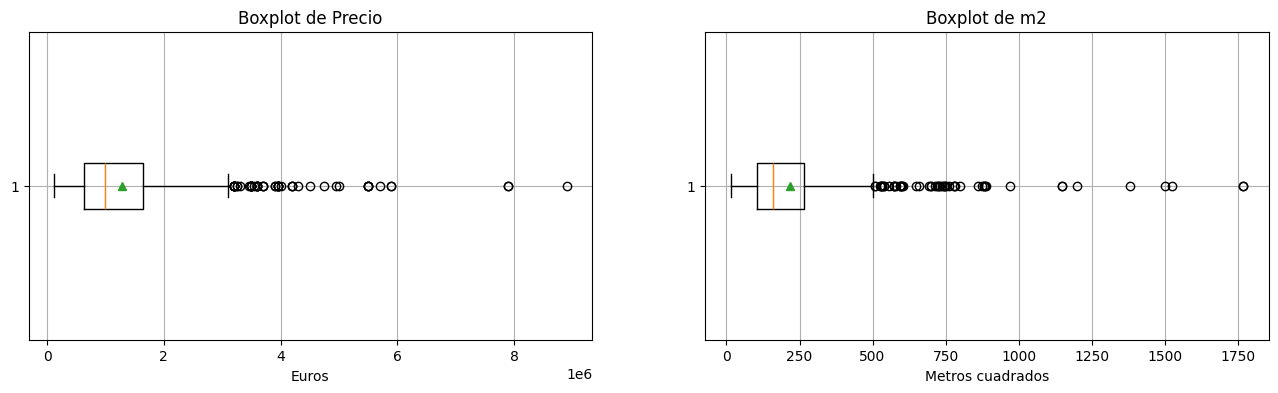

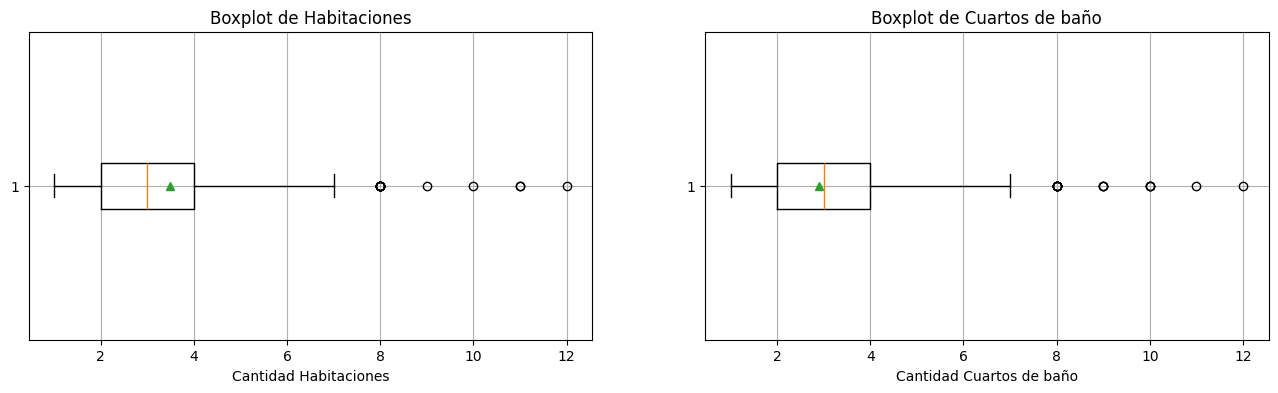

In [12]:
plt.figure(figsize=(16, 4))
boxplot(1, price, "Precio", "Euros")
boxplot(2, m2, "m2", "Metros cuadrados")
plt.figure(figsize=(16, 4))
boxplot(1, bedrooms, "Habitaciones", "Cantidad Habitaciones")
boxplot(2, bathrooms, "Cuartos de baño", "Cantidad Cuartos de baño")

### IQR

In [13]:
print("IQR")
iqr_price = Q3_price - Q1_price
iqr_betr = Q3_bedr - Q1_bedr
iqr_bath = Q3_bath - Q1_bath
iqr_m2 = Q3_m2 - Q1_m2
print(f"price: {round(iqr_price)} Habitaciones: {round(iqr_betr)} baños: {round(iqr_bath)} m2: {round(iqr_m2)}")


IQR
price: 1025000 Habitaciones: 2 baños: 2 m2: 160


### Filtrar 20% mas caro y 20% mas barato

In [62]:
percentil_20 = np.percentile(price, 20)
percentil_80 = np.percentile(price, 80)
print(f"Percentil 20 es: {percentil_20} y Percentil 80 es: {percentil_80}")

viviendas_menor_precio = price[price <= percentil_20]
viviendas_mayor_precio = price[price >= percentil_80]
print(f"\nViviendas bajo el valor de percentil 20 : {viviendas_menor_precio[:15]}")
print(f"\nViviendas sobre el valor de percentil 80 : {viviendas_mayor_precio[:15]}")

Percentil 20 es: 529900.0 y Percentil 80 es: 1850000.0

Viviendas bajo el valor de percentil 20 : [470000 475000 380000 325000 320000 238000 425000 233000 330000 529900
 359000 515000 378000 164000 410000]

Viviendas sobre el valor de percentil 80 : [1920000 1995000 5700000 2190000 3950000 3900000 1970000 4950000 7900000
 2450000 1850000 1850000 2300000 1950000 2100000]


### Filtrar Barrios 20% mas caro y 20% mas barato

In [15]:
barrio_20 = address[price <= percentil_20]
barrio_80 = address[price >= percentil_80]

conteo_20 = Counter(barrio_20)
print("20 Barrios con viviendas bajo el valor de percentil 20:\n")
top_10_20 = conteo_20.most_common(20)
for c, conteo in top_10_20:
    print(f"{c} tiene {conteo} viviendas")
    cdad, cant = zip(*top_10_20)
    
conteo_80 = Counter(barrio_80)
print("\n20 Barrios con viviendas sobre el valor de percentil 80:\n")
top_10_80 = conteo_80.most_common(20)
for c, conteo in top_10_80:
    print(f"{c} tiene {conteo} viviendas")
    cdad, cant = zip(*top_10_80)


20 Barrios con viviendas bajo el valor de percentil 20:

Lavapiés-Embajadores tiene 12 viviendas
Valdeacederas tiene 10 viviendas
Centro tiene 9 viviendas
Guindalera tiene 6 viviendas
Hortaleza tiene 6 viviendas
Fuencarral tiene 5 viviendas
Chueca-Justicia tiene 5 viviendas
Malasaña-Universidad tiene 5 viviendas
Simancas tiene 5 viviendas
San Isidro tiene 4 viviendas
Cuatro Caminos tiene 4 viviendas
Imperial tiene 4 viviendas
Berruguete tiene 4 viviendas
Chamartín tiene 4 viviendas
Ventas tiene 4 viviendas
Palacio tiene 3 viviendas
Ciudad Lineal tiene 3 viviendas
Argüelles tiene 3 viviendas
Prosperidad tiene 3 viviendas
Pacífico tiene 3 viviendas

20 Barrios con viviendas sobre el valor de percentil 80:

Hortaleza tiene 21 viviendas
Barrio de Salamanca tiene 20 viviendas
Chamartín tiene 19 viviendas
Moncloa tiene 19 viviendas
Almagro tiene 13 viviendas
Chamberí tiene 11 viviendas
Recoletos tiene 9 viviendas
Fuencarral tiene 8 viviendas
Castellana tiene 7 viviendas
Centro tiene 6 vivien

### Moda

* Funcion

In [16]:
def moda(var, tit):
    print(f"\nModa de {tit}\n")
    conteo = Counter(var)
    top_10 = conteo.most_common(10)
    for c, conteo in top_10:
        print(f"{c} tiene {conteo} viviendas")
    return top_10


* Calculo

In [17]:
barr_cdad = moda(address, "Barrios")
pri_cdad = moda(price, "Precios")
m2_cdad = moda(m2, "M2")
bat_cdad = moda(bathrooms, "Cuartos de baño" )
bed_cdad = moda(bedrooms, "Habitaciones")
ba_20_cdad = moda(barrio_20, "Barrios precio bajo percentil 20")
ba_80_cdad =moda(barrio_80, "Barrios precio sobre percentil 80")


Moda de Barrios

Barrio de Salamanca tiene 63 viviendas
Hortaleza tiene 60 viviendas
Chamartín tiene 54 viviendas
Moncloa tiene 48 viviendas
Centro tiene 47 viviendas
Fuencarral tiene 35 viviendas
Chamberí tiene 34 viviendas
Malasaña-Universidad tiene 25 viviendas
Goya tiene 22 viviendas
Lista tiene 22 viviendas

Moda de Precios

850000 tiene 15 viviendas
1200000 tiene 14 viviendas
2500000 tiene 13 viviendas
1300000 tiene 12 viviendas
1650000 tiene 12 viviendas
950000 tiene 12 viviendas
1400000 tiene 10 viviendas
990000 tiene 9 viviendas
1250000 tiene 9 viviendas
1450000 tiene 9 viviendas

Moda de M2

133 tiene 12 viviendas
150 tiene 12 viviendas
104 tiene 11 viviendas
120 tiene 11 viviendas
75 tiene 10 viviendas
125 tiene 9 viviendas
70 tiene 9 viviendas
102 tiene 8 viviendas
107 tiene 8 viviendas
88 tiene 8 viviendas

Moda de Cuartos de baño

2 tiene 301 viviendas
3 tiene 207 viviendas
1 tiene 152 viviendas
4 tiene 120 viviendas
5 tiene 71 viviendas
6 tiene 35 viviendas
7 tiene 14 v

* Grafico de Barras

In [18]:
def bar_moda(top_10, sub, tit, colo):
    for x in top_10:
        var2, var3 = zip(*top_10)
    if sub == 1:
        plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, sub)
    plt.title(f"Moda de {tit}")
    plt.bar(var2, var3, color=colo)
    plt.xticks(rotation=45); 
    plt.grid()

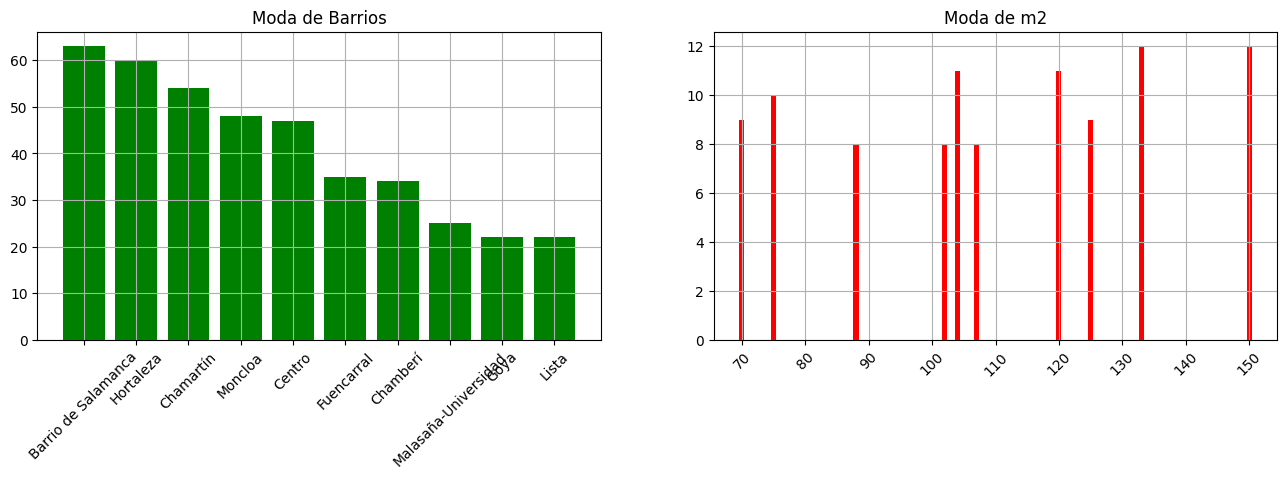

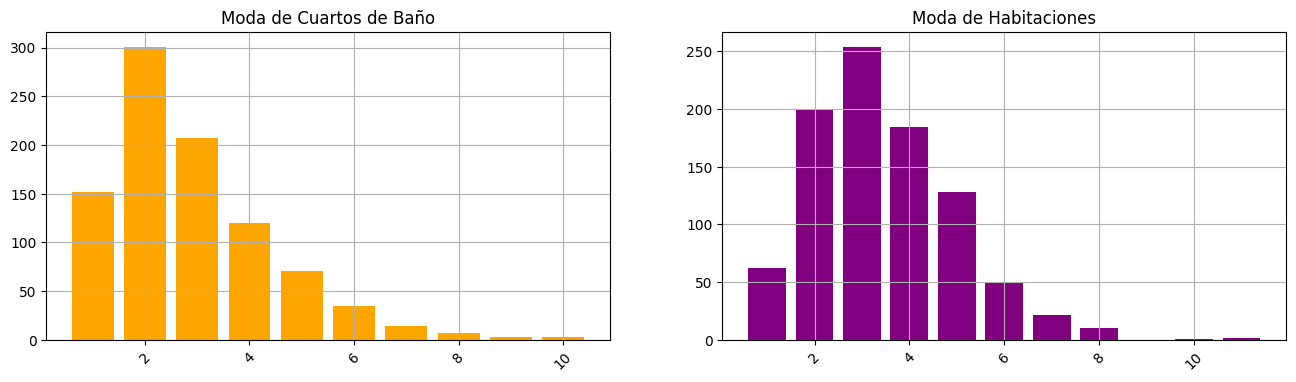

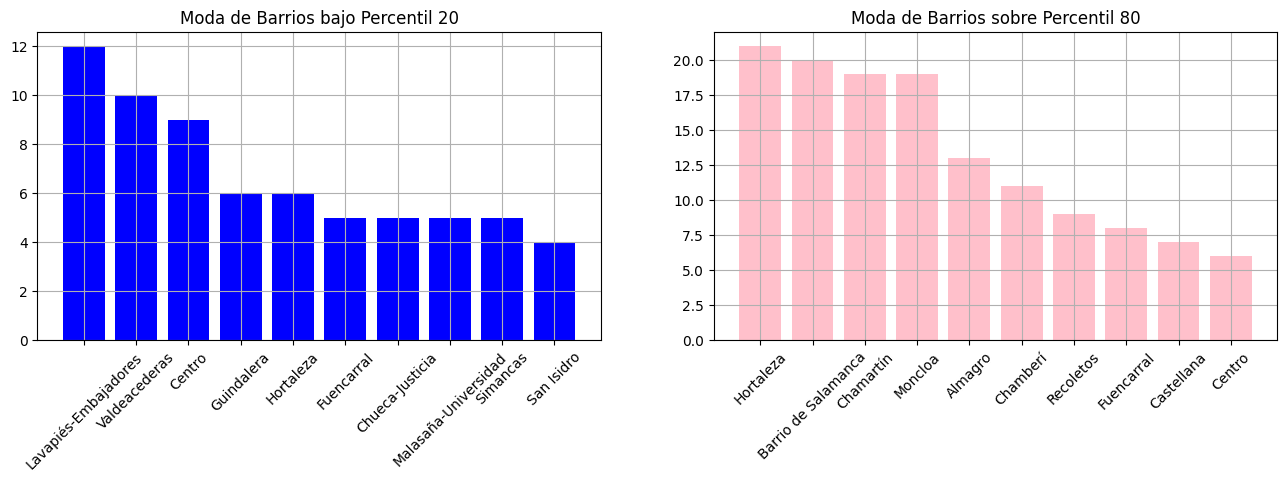

In [19]:
bar_moda(barr_cdad, 1, "Barrios", "green")
bar_moda(m2_cdad, 2, "m2", "red")
bar_moda(bat_cdad, 1, "Cuartos de Baño", "orange")
bar_moda(bed_cdad, 2, "Habitaciones", "purple")
bar_moda(ba_20_cdad, 1, "Barrios bajo Percentil 20", "blue")
bar_moda(ba_80_cdad, 2, "Barrios sobre Percentil 80", "pink")

### Dispersion

* Varianza

In [20]:
print("VARIANZA")
var_price = np.var(price)
var_bedr = np.var(bedrooms)
var_bath = np.var(bathrooms)
var_m2 = np.var(m2)
print(f"price: {round(var_price)} Habitaciones: {round(var_bedr)} baños: {round(var_bath)} m2: {round(var_m2)}")


VARIANZA
price: 1073448095137 Habitaciones: 2 baños: 3 m2: 36726


* Desviacion estardar

In [21]:
print("DESVIACION ESTANDAR")
desv_price = np.std(price)
desv_bedr = np.std(bedrooms)
desv_bath = np.std(bathrooms)
desv_m2 = np.std(m2)
print(f"price: {round(desv_price)} Habitaciones: {round(desv_bedr)} baños: {round(desv_bath)} m2: {round(desv_m2)}")


DESVIACION ESTANDAR
price: 1036073 Habitaciones: 2 baños: 2 m2: 192


### Filtro de outliners

In [22]:
def filtrar_outliers(array, k, Q1, Q3, IQR, tit):
    limite_inf = Q1 - IQR * k
    limite_sup = Q3 + IQR * k
    array_sin_outliers = array[(array >= limite_inf) & (array <= limite_sup)]
    print(f"\n{tit}: {array_sin_outliers[:15]}")
    return array_sin_outliers

In [23]:
price_sin_outliers = filtrar_outliers(price, 1.5, Q1_price, Q3_price, iqr_price, "Precio")
bedrooms_sin_outliers = filtrar_outliers(bedrooms, 1.5, Q1_bedr, Q3_bedr, iqr_betr, "Habitaciones")
bathrooms_sin_outliers = filtrar_outliers(bathrooms, 1.5, Q1_bath, Q3_bath, iqr_bath, "Baños")
m2_sin_outliers = filtrar_outliers(m2, 1.5, Q1_m2, Q3_m2, iqr_m2, "m2")


Precio: [1920000 1995000 1300000 1650000 1590750 1590000 2190000 1190000  675000
  752248  995000 1295000 1175000 1075000 1970000]

Habitaciones: [3 3 4 3 3 5 4 4 2 3 4 3 3 4 5]

Baños: [3 3 3 3 3 4 5 4 2 2 5 2 3 3 5]

m2: [183 170 270 248 116 360 305 183 112 153 291 132 160 229 284]


* Histogramas con y sin outliers

In [24]:
def Histograma3 (sub, xla, xla_sin, tit):
    plt.subplot(1, 2, sub)
    outliers = list(set(xla) - set(xla_sin))
    plt.xlabel(tit)
    plt.ylabel("Cantidad viviendas")
    plt.hist(xla_sin, bins = 50, color = "blue", label="Viviendas sin outliers")
    plt.hist(outliers, bins = 50, color = "red", label="Outliers")
    plt.title(f"Histograma {tit}")
    plt.legend()

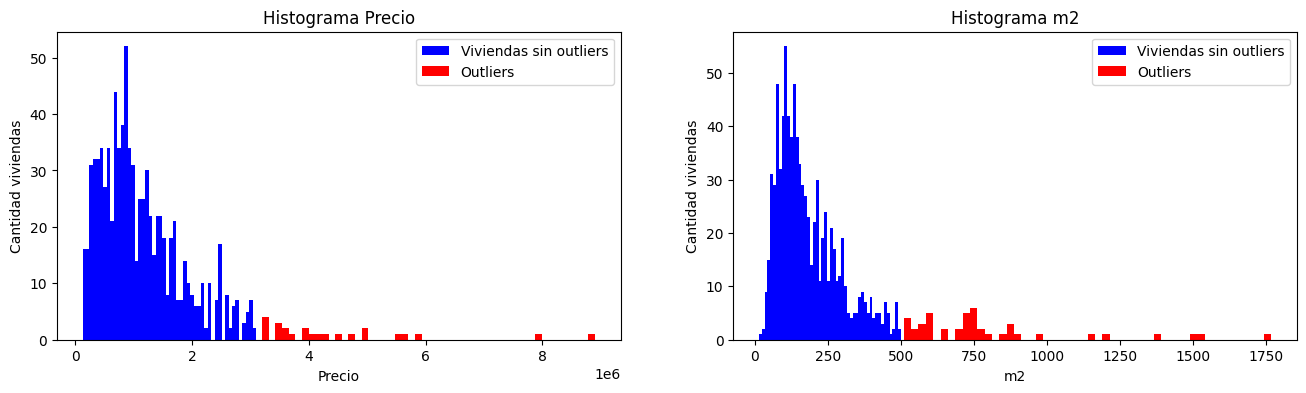

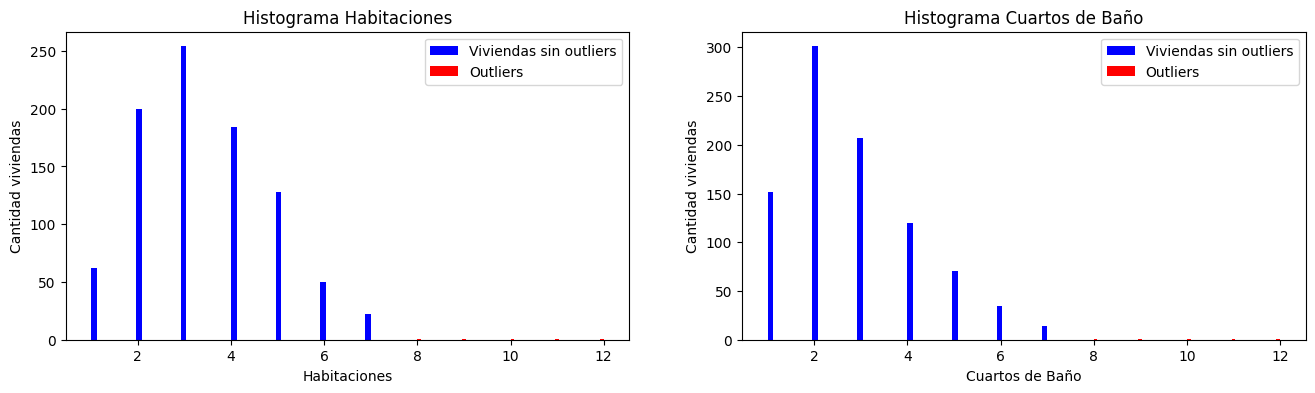

In [25]:
plt.figure(figsize=(16, 4))
Histograma3(1, price, price_sin_outliers, "Precio")
Histograma3(2, m2, m2_sin_outliers, "m2")
plt.show()
plt.figure(figsize=(16, 4))
Histograma3(1, bedrooms, bedrooms_sin_outliers, "Habitaciones")
Histograma3(2, bathrooms, bathrooms_sin_outliers, "Cuartos de Baño")
plt.show();

### Correlacion

In [26]:
columnas = [price, bedrooms, bathrooms, m2]
matriz_lista = list()
for columna1 in columnas:
    fila = list()
    for columna2 in columnas:
        fila.append(stats.pearsonr(columna1, columna2)[0])  
    matriz_lista.append(fila)
    
matriz = np.array(matriz_lista)
print(f"MATRIZ CORRELACION:\n\n{matriz}")

MATRIZ CORRELACION:

[[1.         0.55775773 0.69162529 0.68176241]
 [0.55775773 1.         0.7727368  0.71583895]
 [0.69162529 0.7727368  1.         0.81873292]
 [0.68176241 0.71583895 0.81873292 1.        ]]


* Grafico Matriz correlación

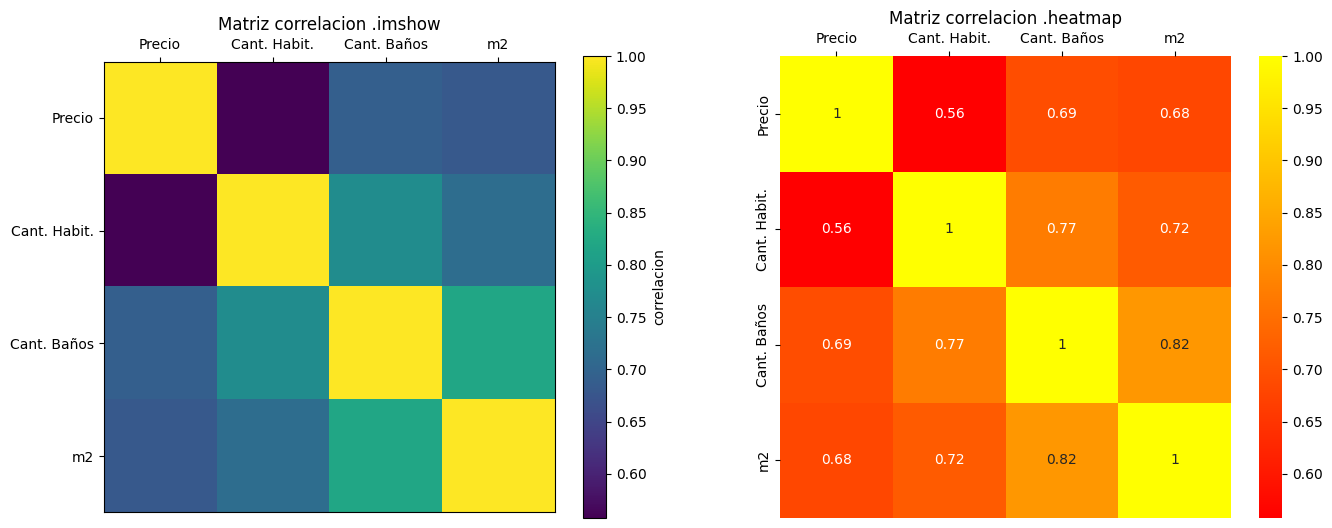

In [52]:
column_names = ['Precio', 'Cant. Habit.', 'Cant. Baños', 'm2']
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title("Matriz correlacion .imshow")
plt.imshow(matriz, cmap="viridis")
plt.colorbar(label="correlacion")
plt.xticks(range(len(column_names)), column_names)
plt.yticks(range(len(column_names)), column_names)
plt.gca().xaxis.set_ticks_position("top")
plt.subplot(1, 2, 2)
plt.title("Matriz correlacion .heatmap")
sns.heatmap(matriz, annot=True, cmap='autumn', xticklabels=column_names, yticklabels=column_names)
plt.gca().xaxis.set_ticks_position("top")

### Estandarizacion

In [28]:
print("VALORES ESTANDARIZADOS")
std_price = (price_sin_outliers - mean_price) / desv_price
std_bedr = (bedrooms_sin_outliers - mean_bedr) / desv_bedr
std_bath = (bathrooms_sin_outliers - mean_bath) / desv_bath
std_m2 = (m2_sin_outliers - mean_m2) / desv_m2
print(f"\nprice: {std_price[:10]} \nHabitaciones: {std_bedr[:10]} \nbaños: {std_bath[:10]} \nm2: {std_m2[:10]}")


VALORES ESTANDARIZADOS

price: [ 0.60750979  0.67989849  0.00909659  0.3469105   0.28972343  0.28899954
  0.86810909 -0.09707349 -0.59414252 -0.5195841 ] 
Habitaciones: [-0.30625211 -0.30625211  0.32773133 -0.30625211 -0.30625211  0.96171478
  0.32773133  0.32773133 -0.94023556 -0.30625211] 
baños: [ 0.06117968  0.06117968  0.06117968  0.06117968  0.06117968  0.67633802
  1.29149635  0.67633802 -0.55397865 -0.55397865] 
m2: [-0.17865826 -0.24649343  0.27531553  0.16051756 -0.52827026  0.74494359
  0.45794867 -0.17865826 -0.54914262 -0.33520095]


* Histogramas de estandarizacion

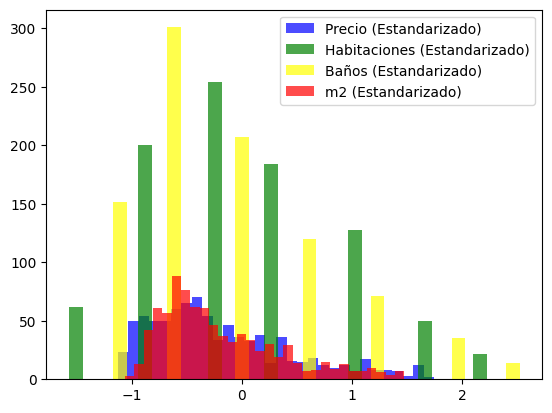

In [54]:
plt.hist(std_price, bins=30, color="blue", alpha=0.7, label="Precio (Estandarizado)")
plt.hist(std_bedr, bins=30, color="green", alpha=0.7, label="Habitaciones (Estandarizado)")
plt.hist(std_bath, bins=30, color="yellow",  alpha=0.7, label="Baños (Estandarizado)")
plt.hist(std_m2, bins=30, color="red", alpha=0.7, label="m2 (Estandarizado)")
plt.legend();

### Asimetria y curtosis

* Asimetria

In [30]:
print(f"Coeficiente de asimetria precio: {stats.skew(price)}")
print(f"Coeficiente de asimetria habitaciones: {stats.skew(bedrooms)}")
print(f"Coeficiente de asimetria baños: {stats.skew(bathrooms)}")
print(f"Coeficiente de asimetria m2: {stats.skew(m2)}")

Coeficiente de asimetria precio: 2.299673447902698
Coeficiente de asimetria habitaciones: 0.9551772363319287
Coeficiente de asimetria baños: 1.406223480498869
Coeficiente de asimetria m2: 3.358506945156488


Interpretación:

* Cercano a 0 es que no hay asimetría, es decir, que la distribución es simétrica, OK.
* Si es positivo o negativo formará una cola, AL TODOS LOS VALORES SER POSITIVOS LA DISTRIBUCION TIENE ASIMETRIA POSITIVA, POR LO TANTO TIENE COLA HACIA LA DERECHA

* Curtosis

In [31]:
print(f"Coeficiente de curtosis precio: {stats.kurtosis(price)}")
print(f"Coeficiente de curtosis habitaciones: {stats.kurtosis(bedrooms)}")
print(f"Coeficiente de curtosis baños: {stats.kurtosis(bathrooms)}")
print(f"Coeficiente de curtosis m2: {stats.kurtosis(m2)}")

Coeficiente de curtosis precio: 8.547211919938682
Coeficiente de curtosis habitaciones: 1.9333616577839132
Coeficiente de curtosis baños: 3.038919834628685
Coeficiente de curtosis m2: 17.229111152834456


Interpretación:

1. Leptocúrtica ($k_3 > 0$): Decaimiento rápido, cola ligera. TODOS LOS VALORES DE K3 SON MAYORES A CERO POR LO QUE SON KURTOSIS LEPTOCURTICAS
2. Mesocúrtica ($k_3=0$): Curva normal.
3. Paticúrtica ($k_3<0$ ): Decaimiento lento.

* Interpretacion Grafica de la curtosis

In [64]:
def curva_curtosis(sub, var, xla, colo):
    if sub == 1:
        plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, sub)
    sns.kdeplot(var, label=xla, color=colo)
    plt.xlabel(xla)
    plt.title(f"Curva Curtosis {xla}")
    plt.legend()
    

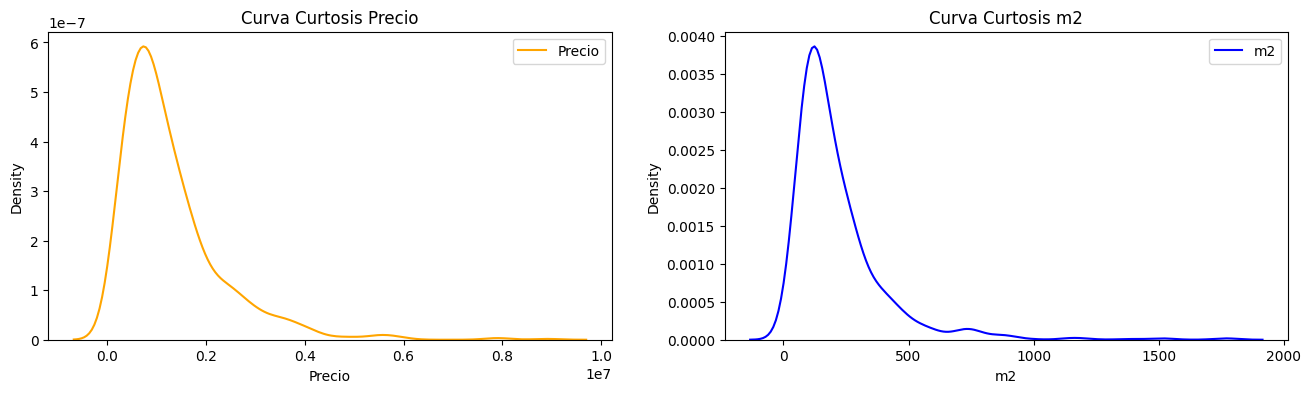

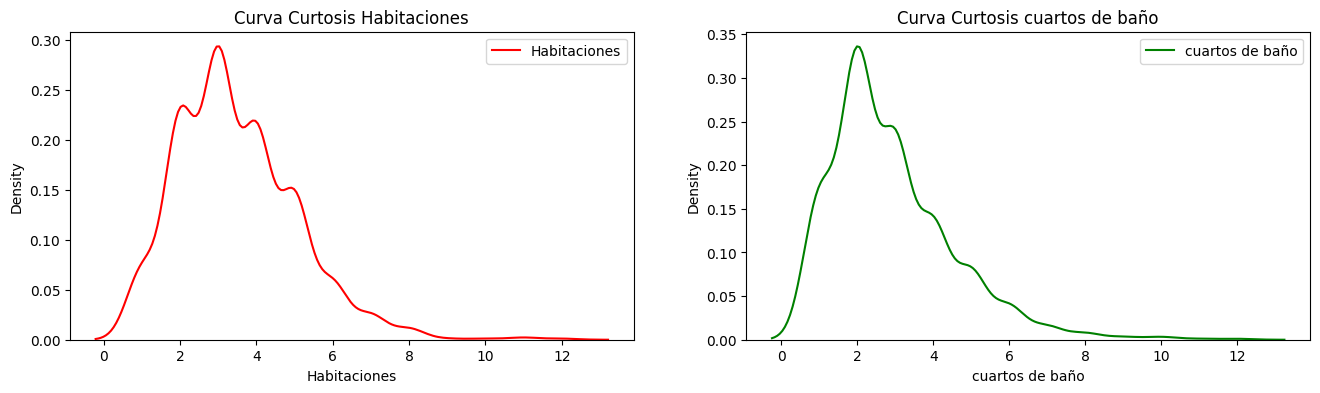

In [65]:
curva_curtosis(1, price, "Precio", "orange")
curva_curtosis(2, m2, "m2", "blue")
curva_curtosis(1, bedrooms, "Habitaciones", "red")
curva_curtosis(2, bathrooms, "cuartos de baño", "green")

### Transformar distribuciones e interpretar resultados

* Funcion raiz

In [33]:
print("FUNCION RAIZ\n")
sqrt_price = np.sqrt(price)
sqrt_bedr = np.sqrt(bedrooms)
sqrt_bath = np.sqrt(bathrooms)
sqrt_m2 = np.sqrt(m2)
print(f"price: {sqrt_price[:10]} \nHabitaciones: {sqrt_bedr[:10]} \nbaños: {sqrt_bath[:10]} \nm2: {sqrt_m2[:10]}")


FUNCION RAIZ

price: [1385.64064606 1412.44468918 1140.1754251  1284.52325787 1261.24938057
 1260.95202129 2387.46727726 1479.86485869 1090.87121146  821.58383626] 
Habitaciones: [1.73205081 1.73205081 2.         1.73205081 1.73205081 2.23606798
 2.         2.         1.41421356 1.73205081] 
baños: [1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 2.
 2.23606798 2.         1.41421356 1.41421356] 
m2: [13.52774926 13.03840481 16.43167673 15.74801575 10.77032961 18.97366596
 17.4642492  13.52774926 10.58300524 12.36931688]


* Funcion logaritmo

In [34]:
print("FUNCION LOGARITMO:\n")
log_price = np.log(price)
log_bedr = np.log(bedrooms)
log_bath = np.log(bathrooms)
log_m2 = np.log(m2)
print(f"price: {log_price[:10]} \nHabitaciones: {log_bedr[:10]} \nbaños: {log_bath[:10]} \nm2: {log_m2[:10]}")


FUNCION LOGARITMO:

price: [14.46783574 14.50615461 14.07787482 14.31628585 14.27971616 14.27924457
 15.55597673 14.5994121  13.98946387 13.42246797] 
Habitaciones: [1.09861229 1.09861229 1.38629436 1.09861229 1.09861229 1.60943791
 1.38629436 1.38629436 0.69314718 1.09861229] 
baños: [1.09861229 1.09861229 1.09861229 1.09861229 1.09861229 1.38629436
 1.60943791 1.38629436 0.69314718 0.69314718] 
m2: [5.20948615 5.13579844 5.59842196 5.51342875 4.75359019 5.88610403
 5.72031178 5.20948615 4.71849887 5.03043792]


* Plots de Transformacion de distribuciones

In [35]:
def plot_transfo(sub, var, color, label1, tit=""):
    if sub == 1:
        plt.figure(figsize=(16, 4))
        plt.title(f"Transformacion distribucion {tit}")
    plt.subplot(1, 3, sub)
    sns.kdeplot(var, color=color, label=label1)
    plt.legend()
    

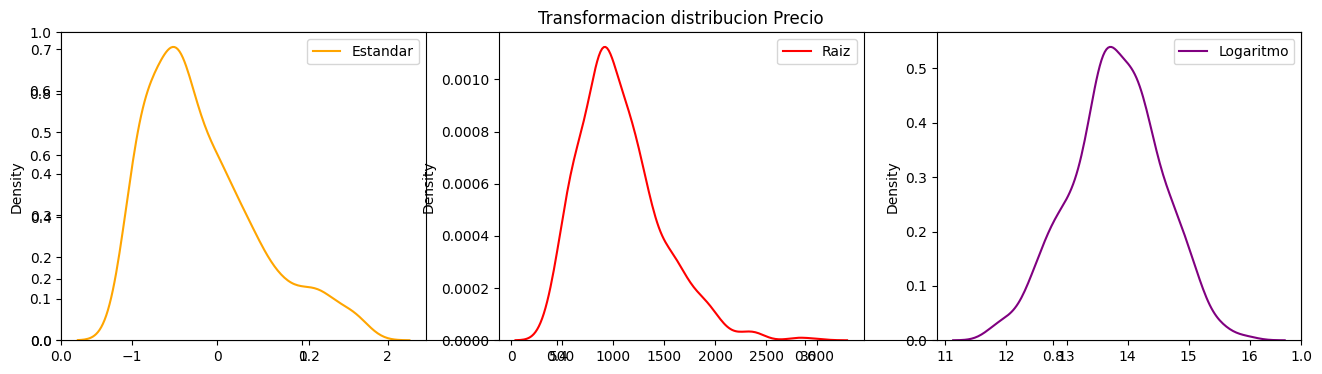

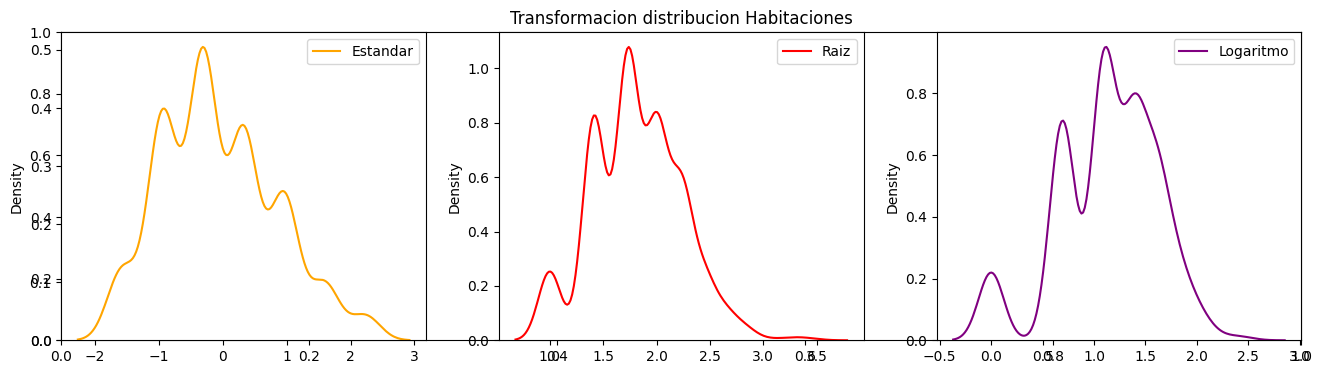

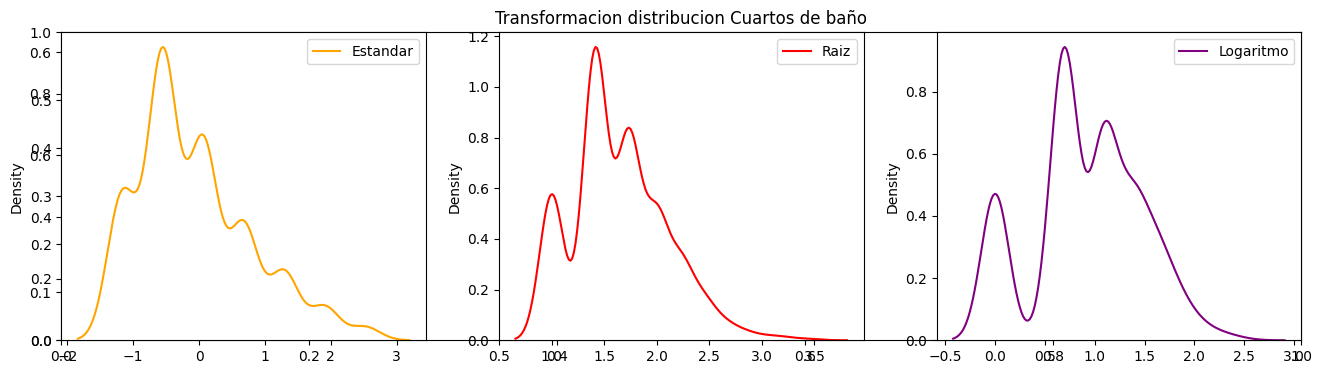

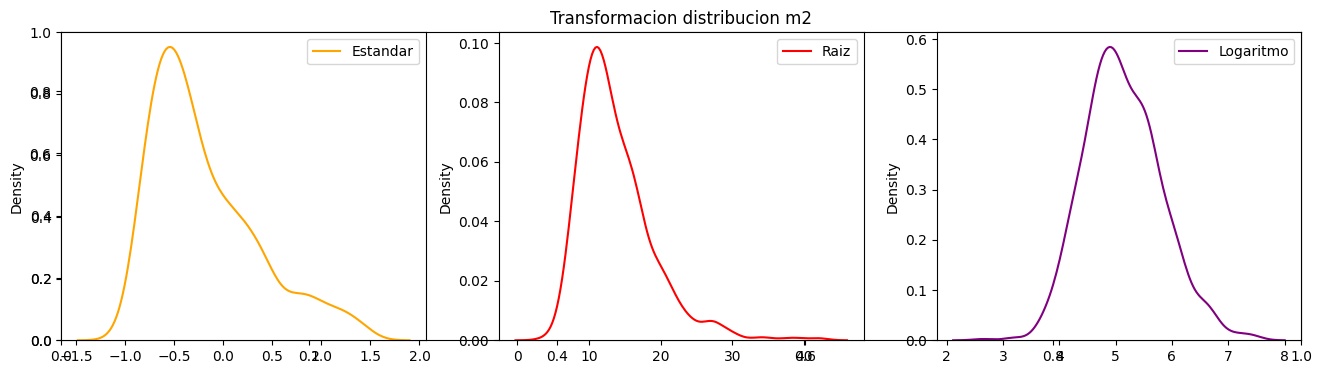

In [36]:

plot_transfo(1, std_price, "orange",  "Estandar", "Precio")
plot_transfo(2, sqrt_price, "red", "Raiz")
plot_transfo(3, log_price, "purple", "Logaritmo")

plot_transfo(1, std_bedr, "orange",  "Estandar", "Habitaciones")
plot_transfo(2, sqrt_bedr, "red", "Raiz")
plot_transfo(3, log_bedr, "purple", "Logaritmo")

plot_transfo(1, std_bath, "orange",  "Estandar", "Cuartos de baño")
plot_transfo(2, sqrt_bath, "red", "Raiz")
plot_transfo(3, log_bath, "purple", "Logaritmo")

plot_transfo(1, std_m2, "orange",  "Estandar", "m2")
plot_transfo(2, sqrt_m2, "red", "Raiz")
plot_transfo(3, log_m2, "purple", "Logaritmo");


##NOTA: En la práctica se realizaría primero la transformación de las distribuciones antes de la estandarización, en este caso se ha hecho en el orden del enunciado del ejercicio 

### Contrastes de 1ª Hipótesis
 * H0 : Las casas del X barrio ("Recoletos") son más baratas de las del Y barrio ("Hortaleza")
 * H1 : Las casas del X barrio son más caras que las del Y barrio


* Nivel de significancia

In [37]:
alpha = 0.05 #valor de significancia, sirve para aceptar o rechazar pruebas

* Selección de barrios y precios

In [38]:
barrio_x = "Barrio de Salamanca"
barrio_y = "Fuencarral"
precios_x = price[address == barrio_x]
print(f"Precios Barrio {barrio_x}: \n{precios_x} ")
precios_y = price[address == barrio_y]
print(f"\nPrecios Barrio {barrio_y}: \n{precios_y} ")

Precios Barrio Barrio de Salamanca: 
[2300000  698000 1050000  750000 1750000  899000 2000000  900000 1490000
 1680000 1450000 1950000 1380000 2200000  715000 1190000 1700000 1800000
 1980000 2450000 2300000 1580000  780000 1150000 1705000  680000 5900000
 1250000 3950000  899000  799000 1490000  698000 1170000  780000  895000
 1250000 1995000 1320000 3490000  720000  698000 3950000 2500000 1175000
  560000  810000 3950000 1100000 1650000 1695000  725000  875000  799000
 2680000 2055000 1195000 1550000 1950000 2650000 1320000 3950000 7900000] 

Precios Barrio Fuencarral: 
[ 470000 1395000 1435000 2200000  820000  850000 1050000  995000  535000
  675000  850000 3000000 2500000 1300000 3500000  975000 1050000  460000
 1950000 2075000 1700000 2095000 1240000 1250000  485000 3000000  650000
  430000  675000  975000  995000  415000  995000 1350000  650000] 


* Normalidad

In [39]:
print("VALORES DE NORMALIDAD")
_, p_barrio_x = stats.normaltest(precios_x)
_, p_barrio_y = stats.normaltest(precios_y)
print(f"\n{barrio_x}: {round(p_barrio_x, 14)}")
print(f"\n{barrio_y}: {round(p_barrio_y, 5)}")

VALORES DE NORMALIDAD

Barrio de Salamanca: 2.85e-12

Fuencarral: 0.00887


* Homogeneidad de varianzas

In [40]:
_, p_levene = stats.levene(precios_x, precios_y)
print(f"HOMOGENEIDAD DE VARIANZAS: {round(p_levene, 4)}")

HOMOGENEIDAD DE VARIANZAS: 0.2347


* Comprobación de valores obtenidos vs significancia

In [41]:
suposiciones = p_barrio_x > alpha and p_barrio_y > alpha and p_levene > alpha

if suposiciones:
    print("Se cumple la asunción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS")
else:
    print("NO se cumple la asunción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS")   

NO se cumple la asunción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS


* Contraste de 1ª Hipótesis

In [42]:

sta1, p_val = stats.ttest_ind(precios_x, precios_y, alternative="greater")

print(f"\nContraste de Hipotesis 1: Precios {barrio_x} vs {barrio_y}")
print(f"Valor estadístico {round(sta1, 2)}")
print(f"Valor p: {round(p_val, 4)}\n")



Contraste de Hipotesis 1: Precios Barrio de Salamanca vs Fuencarral
Valor estadístico 1.97
Valor p: 0.0259



* Conclusion:

In [43]:
print("CONCLUSION:")
if p_val < alpha:
    print(f"H1 VERDADERO (H alternativa): \nLas viviendas del barrio {barrio_x} son mas caras que las del barrio {barrio_y}. \nRECHAZAMOS H0 (H nula) ")
else:
    print(f"H0 VERDADERO (H nula): \nLas viviendas del barrio {barrio_x} son mas baratas que las del barrio {barrio_y}. \nRECHAZAMOS H1 (H alrenativa)")    

CONCLUSION:
H1 VERDADERO (H alternativa): 
Las viviendas del barrio Barrio de Salamanca son mas caras que las del barrio Fuencarral. 
RECHAZAMOS H0 (H nula) 


 ### Contraste de la 2ª Hipótesis

 * H0: Las casas de >= 3 baños son más caras que las casas de 1-2 baños
 * H1: Las casas de >= 3 baños son más baratas que las casas de 1-2 baños

* Nivel de significancia

In [44]:
alpha = 0.05

* Preparación de datos

In [45]:
price_3_bath = price[bathrooms >= 3]
print(f"Precios viviendas >= 3 Baños:\n{price_3_bath[:15]} ")

price_1_2_bath = price[(bathrooms == 1) | (bathrooms ==2)]
print(f"\nPrecios viviendas 1 o 2 Baños:\n{precios_x[:15]} ")

Precios viviendas >= 3 Baños:
[1920000 1995000 1300000 1650000 1590750 1590000 5700000 2190000 3950000
  995000 1295000 3900000 1175000 1075000 1970000] 

Precios viviendas 1 o 2 Baños:
[2300000  698000 1050000  750000 1750000  899000 2000000  900000 1490000
 1680000 1450000 1950000 1380000 2200000  715000] 


 * Normalidad

In [46]:
_, p_price_3 = stats.normaltest(price_3_bath) 
print(f"\nPrecios viviendas >= 3 Baños:\n{precios_x[:15]} ")

_, p_price_1_2 = stats.normaltest(price_1_2_bath)
print(f"\nPrecios viviendas 1 o 2 Baños:\n{precios_x[:15]} ")


Precios viviendas >= 3 Baños:
[2300000  698000 1050000  750000 1750000  899000 2000000  900000 1490000
 1680000 1450000 1950000 1380000 2200000  715000] 

Precios viviendas 1 o 2 Baños:
[2300000  698000 1050000  750000 1750000  899000 2000000  900000 1490000
 1680000 1450000 1950000 1380000 2200000  715000] 


* Homogeneidad de varianzas

In [47]:
_, p_levene_bath = stats.levene(price_3_bath, price_1_2_bath)
print(f"HOMOGENEIDAD DE VARIANZAS: {p_levene_bath} ")

HOMOGENEIDAD DE VARIANZAS: 6.638363732201323e-27 


* Comprobar valores p obtenidos vs significancia

In [48]:
suposiciones = p_price_3 > alpha and p_price_1_2 > alpha and p_levene_bath > alpha 

if suposiciones:
    print("Se cumple la asuncion de NORMALIDAD y HOMOGENEIDAD DE VARIANZAS")
else:
    print("NO se cumple la asuncion de NORMALIDAD y HOMOGENEIDAD DE VARIANZAS")

NO se cumple la asuncion de NORMALIDAD y HOMOGENEIDAD DE VARIANZAS


* Contraste de 2º Hipotesis y Conclusiones

In [49]:
sta2, p_val_2 = stats.ttest_ind(price_3_bath, price_1_2_bath, alternative="greater")

print("\nContraste de Hipotesis 1: \nPrecios en viviendas con 3 o más cuartos de baño vs viviendas con 1 y 2 cuartos de baño")
print(f"Valor estadístico {round(sta2, 2)}")
print(f"Valor p: {p_val_2}\n")


Contraste de Hipotesis 1: 
Precios en viviendas con 3 o más cuartos de baño vs viviendas con 1 y 2 cuartos de baño
Valor estadístico 21.67
Valor p: 1.1710717206053355e-84



* Conclusion:

In [50]:
print("CONCLUSION: ")
if p_val_2 < alpha:
    print("H0 VERDADERO (H nula): \nLas casas de >= 3 baños son más caras que las casas de 1-2 baños. \nRECHAZAMOS H1 (H Alternativa)")
else:
    print("H1 VERDADERO (H alternativa): \nLas casas de >= 3 baños son más baratas que las casas de 1-2 baños. \nRECHAZAMOS H0 (H Nula)")    

CONCLUSION: 
H0 VERDADERO (H nula): 
Las casas de >= 3 baños son más caras que las casas de 1-2 baños. 
RECHAZAMOS H1 (H Alternativa)
